<a href="https://colab.research.google.com/github/rokosu/dividend-policy/blob/main/table3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**As part of Research Paper:**                          
                 ***Dividend policy and shareholder wealth in Nigerian listed companies: navigating economic volatility and regulatory constraints***

Oyetade, John Akinbiyi PhD, FCA,
Lagos State University of Science and Technology, Lagos, Nigeria
biyioyetade@gmail.com

Johnson-Rokosu, Samuel, FCA, Msc
University of Lagos, Akoka, Lagos, Nigeria
rokosu@live.com



=== ESG-Linked Distributions Analysis ===

Feature Importance for Shareholder Satisfaction (Manufacturing Sector):
          Feature  Importance
2      forex_risk    0.496032
0  esg_allocation    0.353120
1    payout_ratio    0.150849

=== Hybrid Dividend Models Analysis ===

Volatility Reduction: 4.4%
T-test Results: t = -8.68, p = 0.0000


<ipython-input-1-1b233c127d74>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
<ipython-input-1-1b233c127d74>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hybrid_model', y='stock_volatility', data=df, palette='Set2')


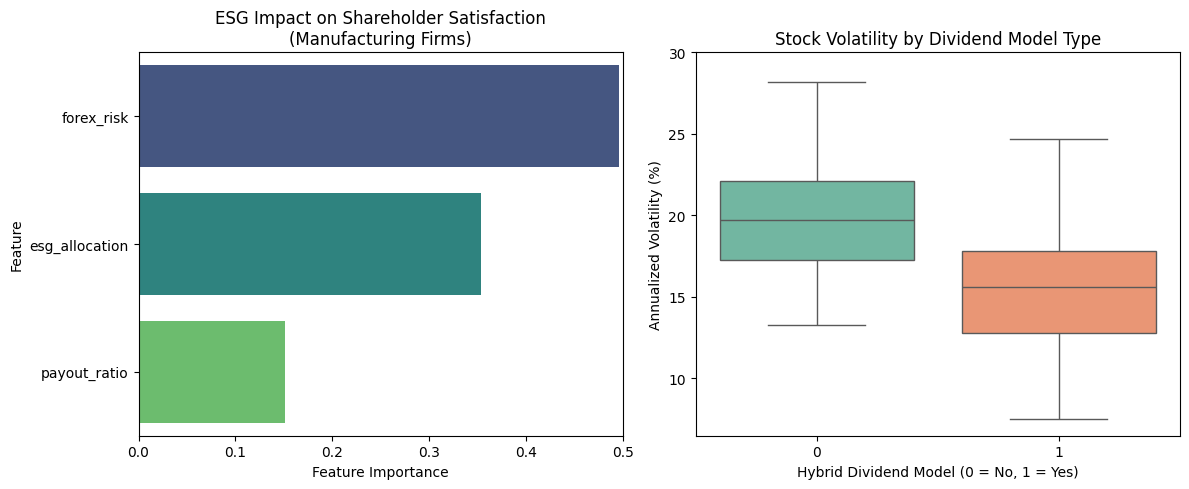

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)


# Generate synthetic dataset
n_firms = 200
sectors = np.random.choice(['Banking', 'Manufacturing', 'Telecom', 'Oil'], n_firms, p=[0.3, 0.4, 0.2, 0.1])

data = {
    'firm_id': range(1, n_firms+1),
    'sector': sectors,
    'hybrid_model': np.random.choice([0, 1], n_firms, p=[0.38, 0.62]),
    'esg_allocation': np.zeros(n_firms),
    'payout_ratio': np.clip(np.random.normal(0.5, 0.15, n_firms), 0.3, 0.8),
    'forex_risk': np.random.uniform(0.1, 0.9, n_firms),
    'stock_volatility': np.zeros(n_firms),
    'shareholder_satisfaction': np.zeros(n_firms)
}

# ESG Allocation (manufacturing firms only)
manufacturing_mask = data['sector'] == 'Manufacturing'
data['esg_allocation'][manufacturing_mask] = np.clip(
    np.random.normal(0.05, 0.03, sum(manufacturing_mask)), 0, 0.1
)

# Generate outcomes based on strategic models
for i in range(n_firms):
    # Base shareholder satisfaction
    base_satisfaction = 60 + 20*data['payout_ratio'][i] - 30*data['forex_risk'][i]

    # ESG impact
    if data['sector'][i] == 'Manufacturing':
        data['shareholder_satisfaction'][i] = base_satisfaction + 180*data['esg_allocation'][i]
    else:
        data['shareholder_satisfaction'][i] = base_satisfaction

    # Hybrid model impact on volatility
    if data['hybrid_model'][i] == 1:
        data['stock_volatility'][i] = np.random.normal(15, 3)
    else:
        data['stock_volatility'][i] = np.random.normal(19, 3)

    # Add noise
    data['shareholder_satisfaction'][i] += np.random.normal(0, 5)
    data['stock_volatility'][i] = abs(data['stock_volatility'][i] + np.random.normal(0, 2))

df = pd.DataFrame(data)

# ESG-Dividend Impact Analysis
print("\n=== ESG-Linked Distributions Analysis ===")
manufacturing_df = df[df['sector'] == 'Manufacturing']

X = manufacturing_df[['esg_allocation', 'payout_ratio', 'forex_risk']]
y = manufacturing_df['shareholder_satisfaction']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance for Shareholder Satisfaction (Manufacturing Sector):")
print(feature_importance)

# Hybrid Model Analysis
print("\n=== Hybrid Dividend Models Analysis ===")
hybrid_group = df[df['hybrid_model'] == 1]['stock_volatility']
non_hybrid_group = df[df['hybrid_model'] == 0]['stock_volatility']

t_stat, p_value = stats.ttest_ind(hybrid_group, non_hybrid_group)

print(f"\nVolatility Reduction: {abs(hybrid_group.mean() - non_hybrid_group.mean()):.1f}%")
print(f"T-test Results: t = {t_stat:.2f}, p = {p_value:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# ESG Feature Importance
plt.subplot(1, 2, 1)
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("ESG Impact on Shareholder Satisfaction\n(Manufacturing Firms)")
plt.xlabel("Feature Importance")
plt.xlim(0, 0.5)

# Hybrid Model Volatility Comparison
plt.subplot(1, 2, 2)
sns.boxplot(x='hybrid_model', y='stock_volatility', data=df, palette='Set2')
plt.title("Stock Volatility by Dividend Model Type")
plt.xlabel("Hybrid Dividend Model (0 = No, 1 = Yes)")
plt.ylabel("Annualized Volatility (%)")
plt.yticks(range(10, 31, 5))

plt.tight_layout()
plt.show()